> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

  In the healthcare field numerous data is produced including patients and disease and the main target is to benefit the patient. In this data set - No show appointments- which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up


### Question(s) for Analysis
- What is distribution of age group among non showed people and which mean age is greater male or females
- Which patient group doesn't attend the most
- Does recieved sms affect showing in appointment
- Which day of week has most appointments and which has the most of non showing


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\pc\AppData\Local\Temp\pip-install-9mv8m0hx\pandas_25a15d10581d442b92a7df813fdaef92\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py ->


  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\pc\anaconda3\lib\site-packages\pandas-1.5.2.dist-info\
   from C:\Users\pc\anaconda3\Lib\site-packages\~andas-1.5.2.dist-info
  Moving to c:\users\pc\anaconda3\lib\site-packages\pandas\
   from C:\Users\pc\anaconda3\Lib\site-packages\~-ndas


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# cheking for information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Determine number of rows and columns
df.shape

(110527, 14)

In [7]:
# identifying types of data columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# cheking for any empty values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#checking for duplicated values 
df.duplicated().sum()

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# rebaning these columns to their correct spelling 
df.rename(columns = {'Hipertension': 'Hypertension','Handcap':'Handicap'},inplace=True)


In [11]:
# removing patientid and appointmentid columns as we won't use them
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [12]:
# checking for negative values which i encountered on making graphs so added this part
x = df[ (df['Age'] < 0) ].index
df.drop(x,inplace=True)

In [13]:
# making column name in lowercase to make it easy to work with
df.columns = df.columns.str.lower()

In [14]:
# changing type of appointmentday and scheduledday columns to datetime to be easy to work with
df['scheduledday'] = pd.to_datetime(df['scheduledday'],format='%Y-%m-%d %H:%M:%S')
df['appointmentday'] = pd.to_datetime(df['appointmentday'],format='%Y-%m-%d %H:%M:%S')
df['num_days'] = (df['appointmentday']-df['scheduledday']).dt.days
df.num_days.head(10)

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8   -1
9    1
Name: num_days, dtype: int64

In [15]:
# making a new column for number of days
df.num_days = np.where(df.num_days<0, 0, df.num_days)
df.num_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: num_days, dtype: int64

In [16]:
df['num_days'].unique()

array([  0,   1,   2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

In [17]:
#checking that datatypes changed correctly
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no-show                        object
num_days                        int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

 explorations.


### Research Question 1 (What is distribution of age group among non showed people and which mean age is greater male or females)

no-show
No     AxesSubplot(0.125,0.11;0.775x0.77)
Yes    AxesSubplot(0.125,0.11;0.775x0.77)
Name: age, dtype: object

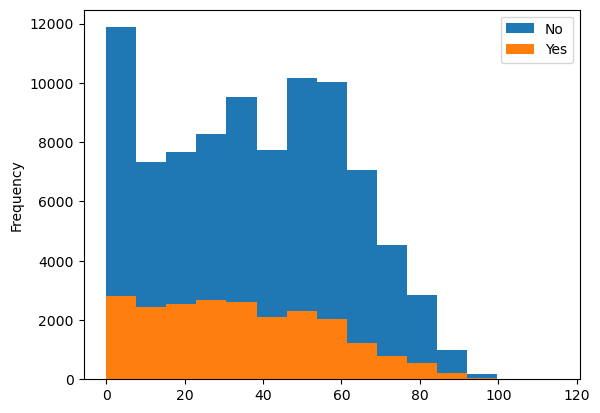

In [18]:
df.groupby('no-show')['age'].plot(kind='hist',legend=True,bins=15)

In this plot the distribution of age against appointment show in which Yes is people who didn't show and No is people who showed

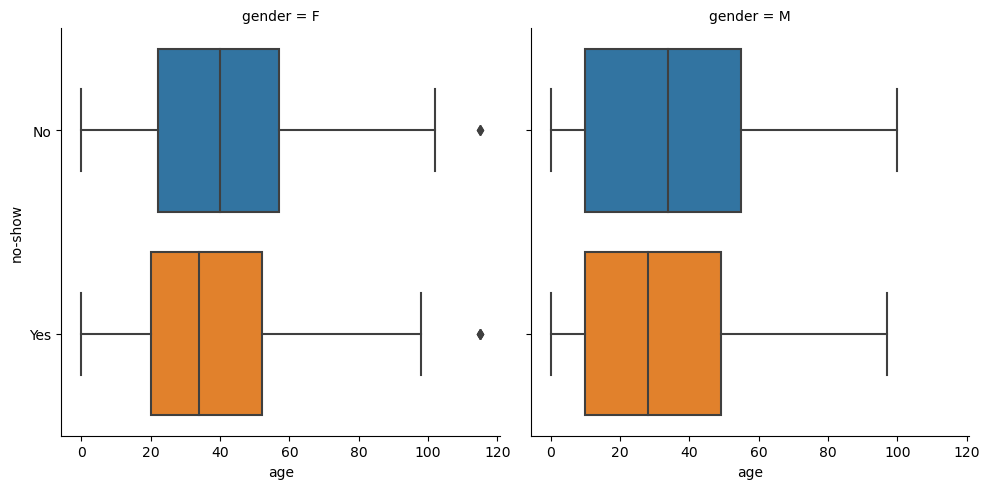

In [19]:
sns.catplot(x='age',y='no-show',data=df,kind='box',col='gender')

In this box plot the mean age of who didn't show is younger and mean age of non showing females is older than males 
Outliers is also shown

### Research Question 2  (Which patient group doesn't attend the most?)

<AxesSubplot:xlabel='no-show'>

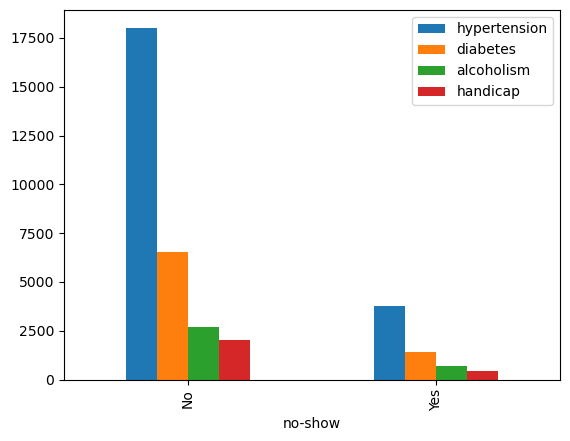

In [20]:
df.groupby('no-show')[['hypertension','diabetes','alcoholism','handicap']].sum().plot(kind='bar')

This plot show that hypertension is most common patient group and it is the highest for no show for appointments may indicate that hypertension patient doesn't feel ill so attend appointment on time 

### Research Question 3  (Does recieved sms affect showing in appointment?)

In the next plot the patients who didn't show and recieved sms against the count of sms

<AxesSubplot:xlabel='no show and recieved sms'>

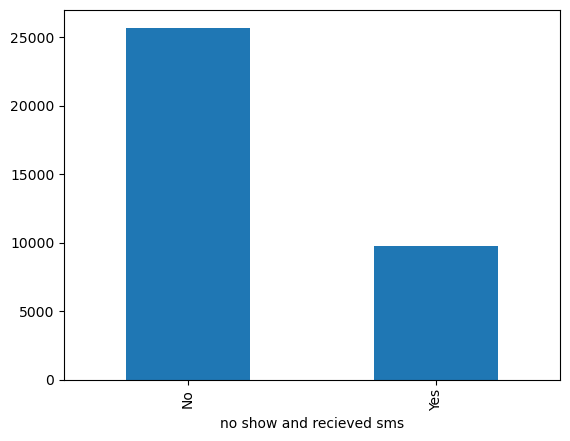

In [21]:
df.query('sms_received== 1').groupby('no-show')['sms_received'].count().plot(kind='bar', xlabel='no show and recieved sms')

In the next plot the patients who didn't show against the count of patients didn't recieve sms

<AxesSubplot:xlabel="no show and didn't recieve sms">

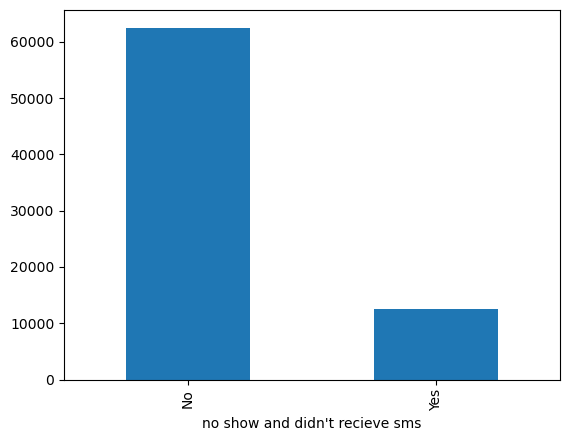

In [22]:
df.query('sms_received== 0').groupby('no-show')['sms_received'].count().plot(kind='bar', xlabel='no show and didn\'t recieve sms')

Conclusion in the last two graphs, 
in spite of patients non showing at appointment in both cases whether recieved or didn't recieve is nearly equal but on comparing the proportion of both, the sms has lowered the proportion of non showing at appointment

### Research Question 4  (Which day of week has most appointments and which has the most of non showing ?)

In [23]:
# making a new column with day names of appointment
df['Day'] = df['appointmentday'].dt.day_name()

In [24]:
#checking it worked
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,num_days,Day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday


<AxesSubplot:xlabel='Days of the week', ylabel='Count of appointment days'>

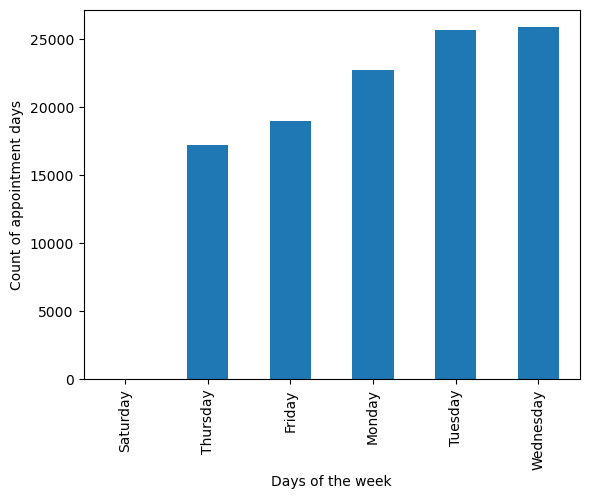

In [25]:
#making a bar plot for days of week against appointment days count
df.Day.value_counts().sort_values().plot(kind='bar',xlabel= 'Days of the week',ylabel='Count of appointment days')

In the previous plot the most common appointment day shown is wednsday

In [26]:
# replacing '-' with '_' so the query function work
df.columns =[column.replace("-", "_") for column in df.columns]

In [27]:
# subsetting the group of people who didn't in appointment
df_yes = df.query('no_show == "Yes"')
df_yes.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,num_days,Day
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,Friday
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2,Friday
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,0,Friday
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1,Friday


<AxesSubplot:xlabel='Day'>

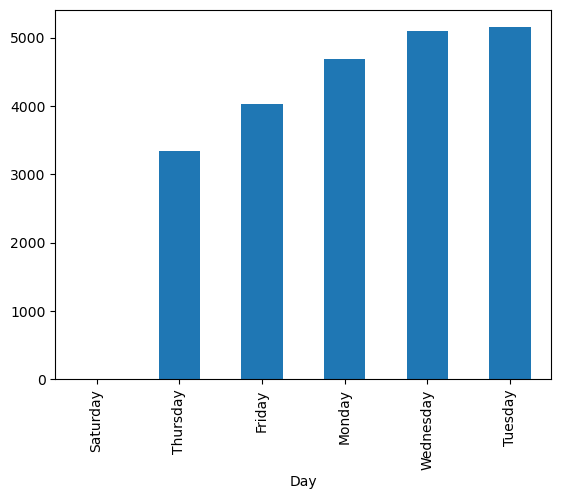

In [28]:
#forming a plot of day column which we made previously against count of non showing in each day 
df_yes.groupby('Day').count()['no_show'].sort_values().plot(kind='bar')

In the previous plot it is concluded that tuesday is the most common day of week to have non showing appointments

<a id='conclusions'></a>
## Conclusions

> For conclusion of this dataset many columns and factors can help us predict what cause the non showing of patients on appointment day including patients group as hypertension disease, day of the week with most non showing , sms recieving and its decreasing of non showing and the distribution of non showing groups according to age and gender

> LImitations:
- The data isn't collected properly the no show columns is misleading with its answers
- Same patient may be added with same appointment id but different dates 

> 

> 

